### Import your libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load your dataset

In [2]:
df = pd.read_csv("HR_Missing_Values.csv")

### Explore your data 

* First 5 recods.
* Last 5 records. 
* Check data types.
* Show statistical summary.
* Is there any missing values?
* Applay two more data analysis from your choose.

In [3]:
df.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [4]:
df.tail()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN
310,NaN,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,2.0


In [5]:
df.shape

(311, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Name      218 non-null    object 
 1   EmpID              311 non-null    int64  
 2   Salary             249 non-null    float64
 3   PositionID         311 non-null    int64  
 4   Position           311 non-null    object 
 5   DOB                280 non-null    object 
 6   Sex                249 non-null    object 
 7   MaritalDesc        311 non-null    object 
 8   RaceDesc           311 non-null    object 
 9   DateofHire         311 non-null    object 
 10  DateofTermination  104 non-null    object 
 11  Department         311 non-null    object 
 12  ManagerName        311 non-null    object 
 13  ManagerID          303 non-null    float64
 14  RecruitmentSource  311 non-null    object 
 15  Absences           280 non-null    float64
dtypes: float64(3), int64(2), o

In [7]:
df = df.astype({"EmpID":'str', "PositionID":'str', "ManagerID":'str' })

In [8]:
df[["EmpID","PositionID","ManagerID"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmpID       311 non-null    object
 1   PositionID  311 non-null    object
 2   ManagerID   311 non-null    object
dtypes: object(3)
memory usage: 7.4+ KB


In [9]:
df[['Last_Name', 'First_Name']] = df['Employee_Name'].str.split(',', expand=True)

In [10]:
df = df.drop(['Employee_Name'], axis=1)

In [11]:
df

,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences,Last_Name,First_Name
0,10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0,Adinolfi,Wilson K
1,10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0,Ait Sidi,Karthikeyan
2,10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0,Akinkuolie,Sarah
3,10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0,Alagbe,Trina
4,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0,Woodson,Jason
307,10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0,Ybarra,Catherine
308,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0,NaN,NaN
309,10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN,Zhou,Julia


In [12]:
df.describe()

,Salary,Absences
count,249.000000,280.000000
mean,67972.662651,10.128571
std,22995.908395,5.946407
min,45046.000000,1.000000
25%,55315.000000,4.750000
50%,62957.000000,10.000000
75%,71707.000000,15.250000
max,220450.000000,20.000000


In [13]:
df.isnull().sum()

EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              0
RecruitmentSource      0
Absences              31
Last_Name             93
First_Name            93
dtype: int64

<AxesSubplot:title={'center':'Missing Data'}>

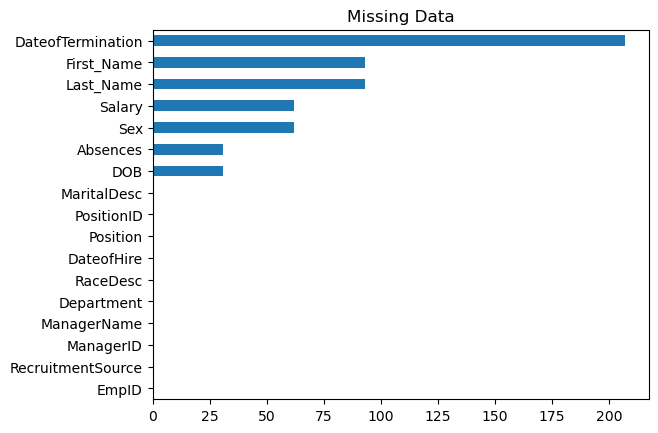

In [14]:
df.isnull().sum().sort_values().plot(kind="barh", title="Missing Data")

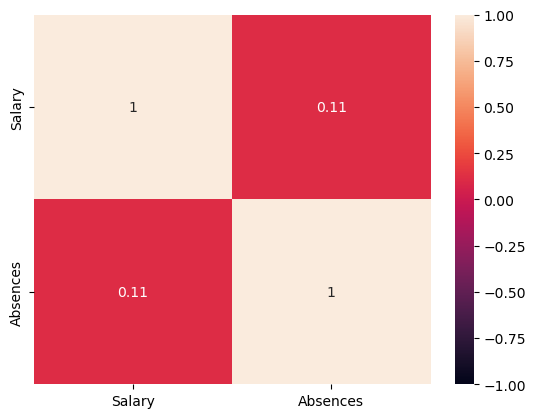

In [15]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [16]:
st = df.loc[df['DOB'].isnull()]

In [17]:
st

,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences,Last_Name,First_Name
3,10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0,Alagbe,Trina
42,10108,110929.0,5,BI Director,NaN,NaN,Married,White,9/6/2016,NaN,IT/IS,Jennifer Zamora,5.0,Indeed,8.0,Champaigne,Brian
69,10310,53189.0,19,Production Technician I,NaN,M,Married,White,7/7/2014,NaN,Production,Amy Dunn,11.0,Indeed,9.0,NaN,NaN
84,10280,60340.0,19,Production Technician I,NaN,NaN,Single,White,4/2/2012,9/27/2018,Production,Michael Albert,22.0,Google Search,16.0,Estremera,Miguel
92,10049,58530.0,19,Production Technician I,NaN,F,Married,White,1/9/2012,NaN,Production,Brannon Miller,12.0,Google Search,19.0,Fidelia,Libby
96,10015,178000.0,12,IT Director,NaN,M,Single,Black or African American,4/15/2011,NaN,IT/IS,Jennifer Zamora,5.0,Indeed,15.0,NaN,NaN
97,10080,99351.0,26,Sr. Accountant,NaN,F,Married,White,1/5/2009,NaN,Admin Offices,Board of Directors,9.0,Other,3.0,Foster-Baker,Amy
107,10255,61555.0,3,Area Sales Manager,NaN,F,Single,White,2/16/2015,NaN,Sales,Lynn Daneault,21.0,Indeed,20.0,Givens,Myriam
112,10300,68898.0,20,Production Technician II,NaN,M,Married,Black or African American,4/26/2010,5/30/2011,Production,Brannon Miller,12.0,Diversity Job Fair,10.0,Gonzalez,Juan
119,10059,63813.0,19,Production Technician I,NaN,NaN,Divorced,White,2/21/2011,1/11/2014,Production,Kelley Spirea,18.0,CareerBuilder,17.0,NaN,NaN


In [18]:
st1 = df.loc[df['DOB'].notnull()]
st1

,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences,Last_Name,First_Name
0,10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0,Adinolfi,Wilson K
1,10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0,Ait Sidi,Karthikeyan
2,10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0,Akinkuolie,Sarah
4,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0,NaN,NaN
5,10002,57568.0,19,Production Technician I,05/22/77,F,Single,White,1/9/2012,NaN,Production,Amy Dunn,11.0,LinkedIn,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,10264,59728.0,19,Production Technician I,10/02/69,NaN,Single,Black or African American,1/9/2012,6/27/2015,Production,Ketsia Liebig,19.0,Diversity Job Fair,16.0,Williams,Jacquelyn
304,10033,70507.0,20,Production Technician II,11/07/58,M,Single,White,1/7/2013,2/21/2016,Production,Brannon Miller,12.0,LinkedIn,7.0,Winthrop,Jordan
306,10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0,Woodson,Jason
309,10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN,Zhou,Julia


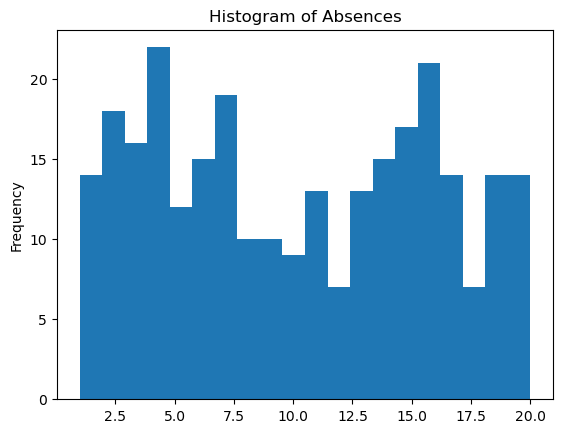

In [19]:
df['Absences'].plot(kind="hist", bins=20, title="Histogram of Absences");

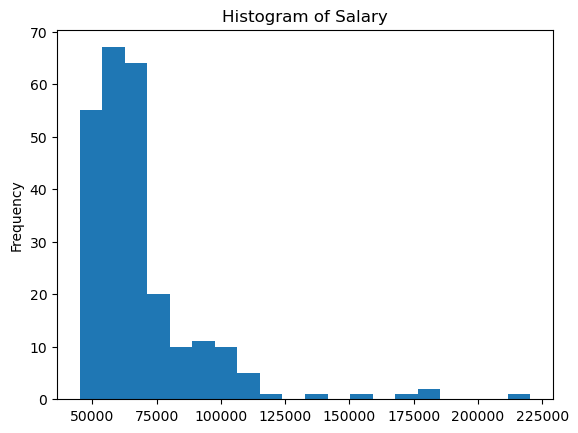

In [20]:
df['Salary'].plot(kind="hist", bins=20, title="Histogram of Salary");

### Do the following steps for each column with missing values.
* Identity the column.
* How much precentage the missing value represents?
* What is the best way to handle these missing values and why?
* Apply your method to the column.

#### Employee_Name

In [21]:
df.First_Name.isna().mean().round(4) * 100

29.9

In [22]:
df.Last_Name.isna().mean().round(4) * 100

29.9

##### In the first time i think i will based on the id if we have same duplicate but we don't have any duplicate , so we will go to drop the rows 

In [23]:
df.EmpID.duplicated().sum()

0

In [24]:
df.dropna(subset=["Last_Name","First_Name"], inplace=True)

In [25]:
df["First_Name"].isnull().sum()

0

In [26]:
df["Last_Name"].isnull().sum()

0

#### Salary

In [27]:
df.Salary.isna().mean().round(4) * 100

19.27

##### I thought of swapping it out for the mean, but we had the Right skewness, so I swapped it for the median

In [28]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)

In [29]:
df.Salary.isnull().sum()

0

#### DOB

In [30]:
df.DOB.isna().mean().round(4) * 100

10.09

##### Because birthdates are personal information I thought some people wouldn't want to share

In [31]:
df['DOB'] = df['DOB'].fillna("Sensitive information")

#### Sex

In [32]:
df.Sex.isna().mean().round(4) * 100

19.27

##### At the beginning, I checked if the name is in the famel, put the value in famel and vice versa, the rest I replaced with the mode

In [33]:
MNames= df[df['Sex']== "M "]

In [34]:
MNames.head(3)

,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences,Last_Name,First_Name
0,10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0,Adinolfi,Wilson K
1,10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0,Ait Sidi,Karthikeyan
7,10062,59365.0,19,Production Technician I,02/18/83,M,Widowed,White,9/30/2013,NaN,Production,Ketsia Liebig,19.0,Employee Referral,19.0,Athwal,Sam


In [35]:
FNames= df[df['Sex']== "F"]

In [36]:
FNames.head(3)

,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences,Last_Name,First_Name
2,10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0,Akinkuolie,Sarah
3,10088,64991.0,19,Production Technician I,Sensitive information,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0,Alagbe,Trina
6,10194,95660.0,24,Software Engineer,05/24/79,F,Single,White,11/10/2014,NaN,Software Engineering,Alex Sweetwater,10.0,LinkedIn,19.0,Andreola,Colby


In [37]:
df.loc[df['First_Name'].isin(FNames['First_Name']), 'Sex']='F'
df.loc[df['First_Name'].isin(MNames['First_Name']), 'Sex']='M '

In [38]:
df.Sex.isnull().sum()

40

In [39]:
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

In [40]:
df.Sex.isnull().sum()

0

#### DateofTermination

In [41]:
df.DateofTermination.isna().mean().round(4) * 100

63.3

##### I believe that employees who do not have an expiration date are still on the job

In [42]:
df['DateofTermination'] = df['DateofTermination'].fillna("didn't finish")

In [43]:
df.DateofTermination.isnull().sum()

0

#### Absences             

In [44]:
df.Absences.isna().mean().round(4) * 100

11.01

##### Replace the mean value because it has no outliers

In [45]:
df['Absences'].fillna(df['Absences'].mean(), inplace=True)

In [46]:
df.Absences.isnull().sum()

0

In [47]:
df.isna().sum()

EmpID                0
Salary               0
PositionID           0
Position             0
DOB                  0
Sex                  0
MaritalDesc          0
RaceDesc             0
DateofHire           0
DateofTermination    0
Department           0
ManagerName          0
ManagerID            0
RecruitmentSource    0
Absences             0
Last_Name            0
First_Name           0
dtype: int64